In [54]:
import sys
sys.path.append("..")

from src.eval.Run import Run

In [55]:
RESULTS = [
    "2025-07-30_18-03-36_librispeech-pc-test-clean_tiny",
    "2025-07-30_18-04-16_librispeech-pc-test-clean_small",
    "2025-07-30_18-04-21_librispeech-pc-test-clean_medium",
    "2025-07-30_18-04-24_librispeech-pc-test-clean_large",
    "2025-07-30_23-03-57_librispeech-pc-test-clean_large-v3",
    "2025-05-05_13-29-23_librispeech-pc-test-clean_large-v3-turbo"
]
runs = [Run.from_directory("../out/" + result) for result in RESULTS]

In [56]:
for run in runs[:5]:
    for sample in run.samples:
        for pt in sample.partials:
            for word in pt.result:
                word.start = word.start + pt.window[0]
                word.end = word.end + pt.window[0]

In [57]:
for run in runs:
    run.build_metrics()

Building metrics: 100%|██████████| 83/83 [00:42<00:00,  1.97it/s]


In [58]:
run.wer

0.19639879624704218

In [59]:
import pandas as pd
df = pd.DataFrame({
    "model": [result.split("_")[-1] for result in RESULTS]
})

In [60]:
df["wer"] = [run.wer for run in runs]
df["wff_latency"] = [run.wff_latency for run in runs]
df["wfc_latency"] = [run.wfc_latency for run in runs]

In [61]:
df

,model,wer,wff_latency,wfc_latency
0,tiny,11.054276,3.964920,1.087426
1,small,5.522877,8.949169,1.879136
2,medium,3.566588,5.418831,2.610264
3,large,3.768202,3.807117,2.786935
4,large-v3,3.620813,3.949331,2.871242
5,large-v3-turbo,0.196399,8.489685,2.510757


In [62]:
from src.eval.utils.draw_alignments import draw

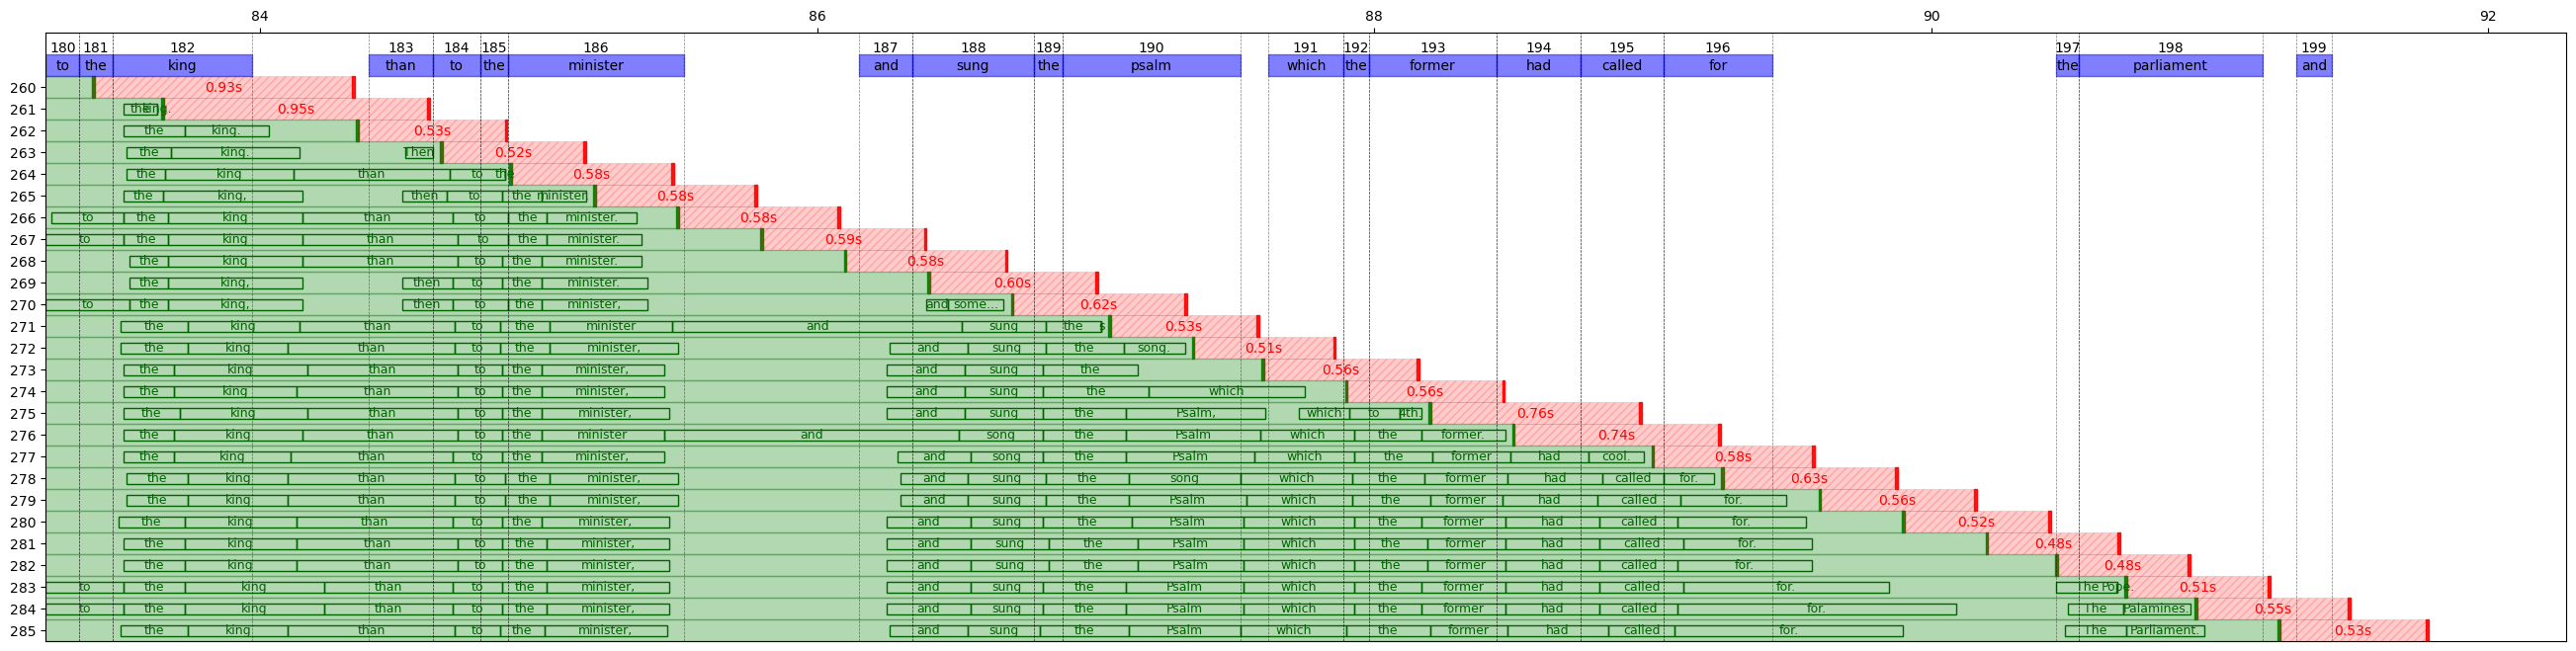

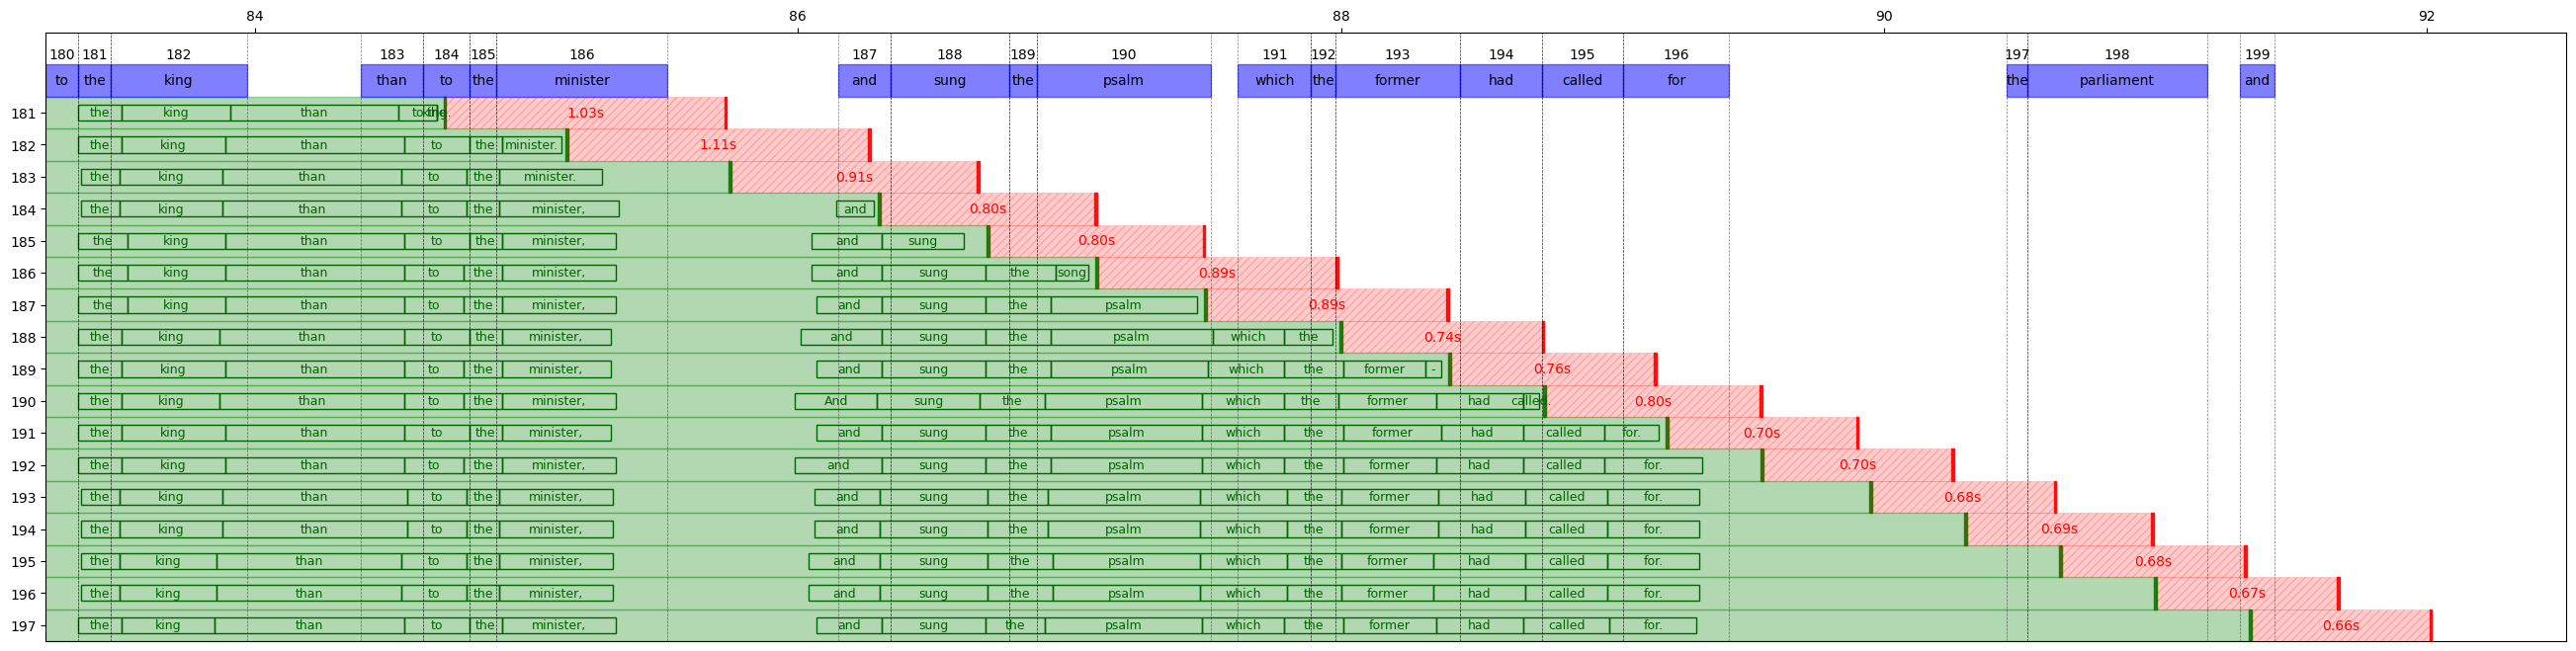

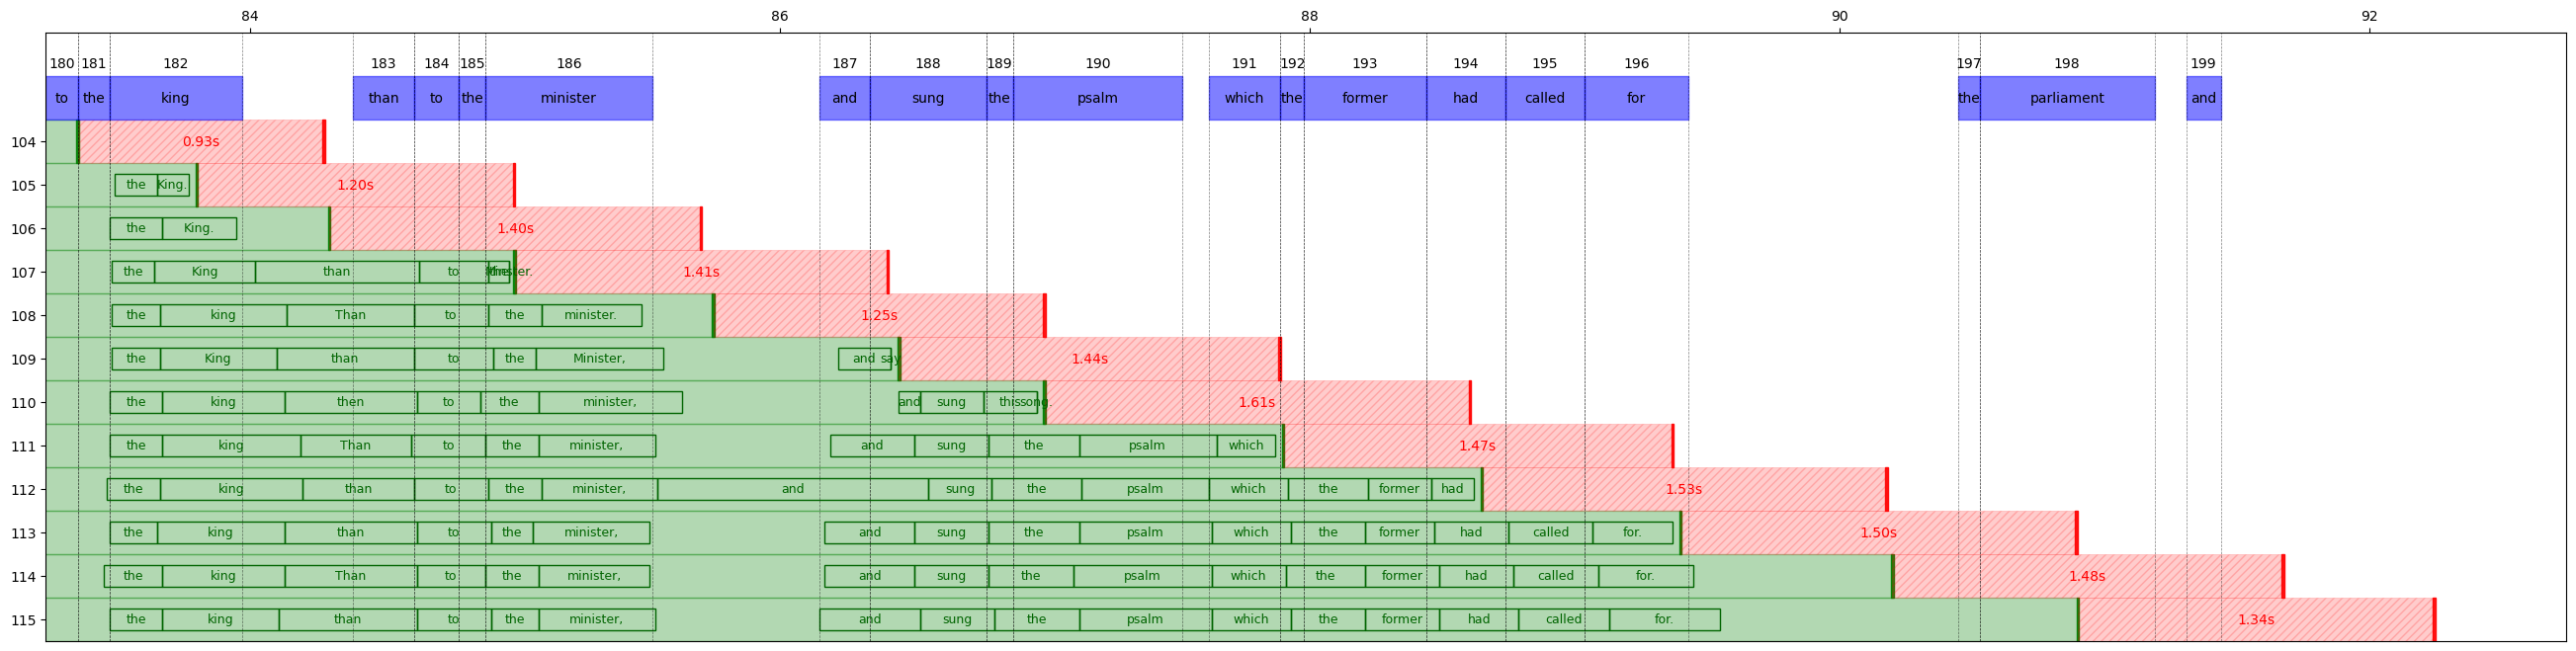

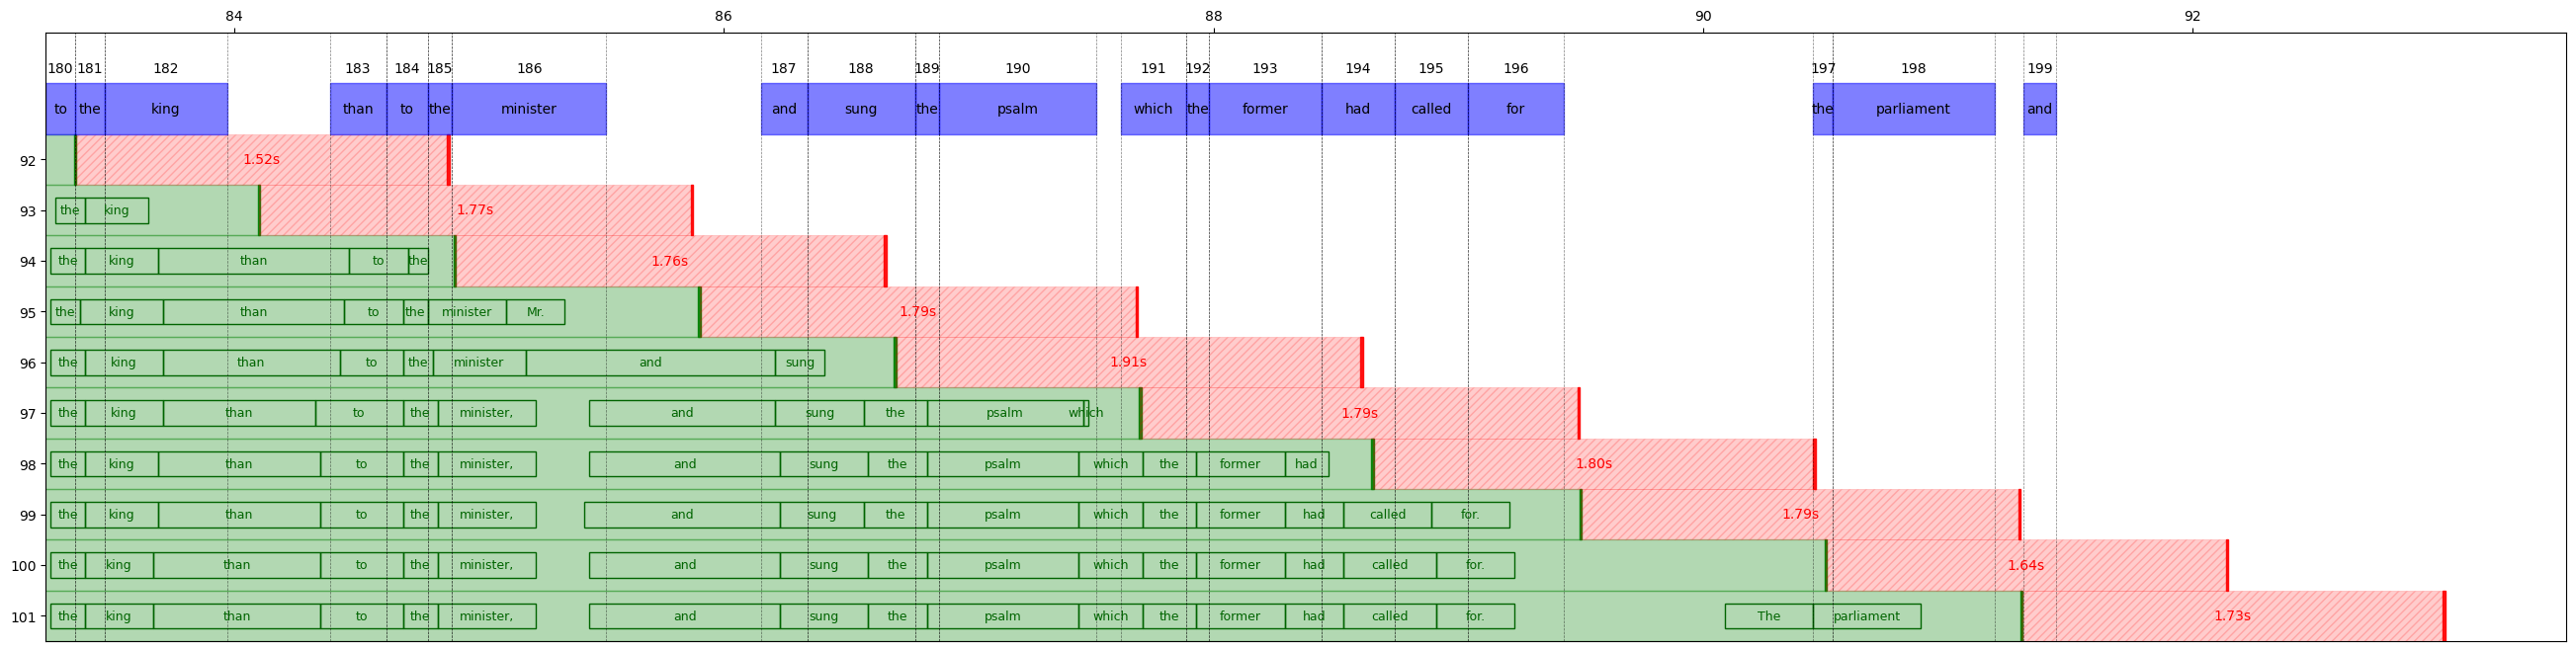

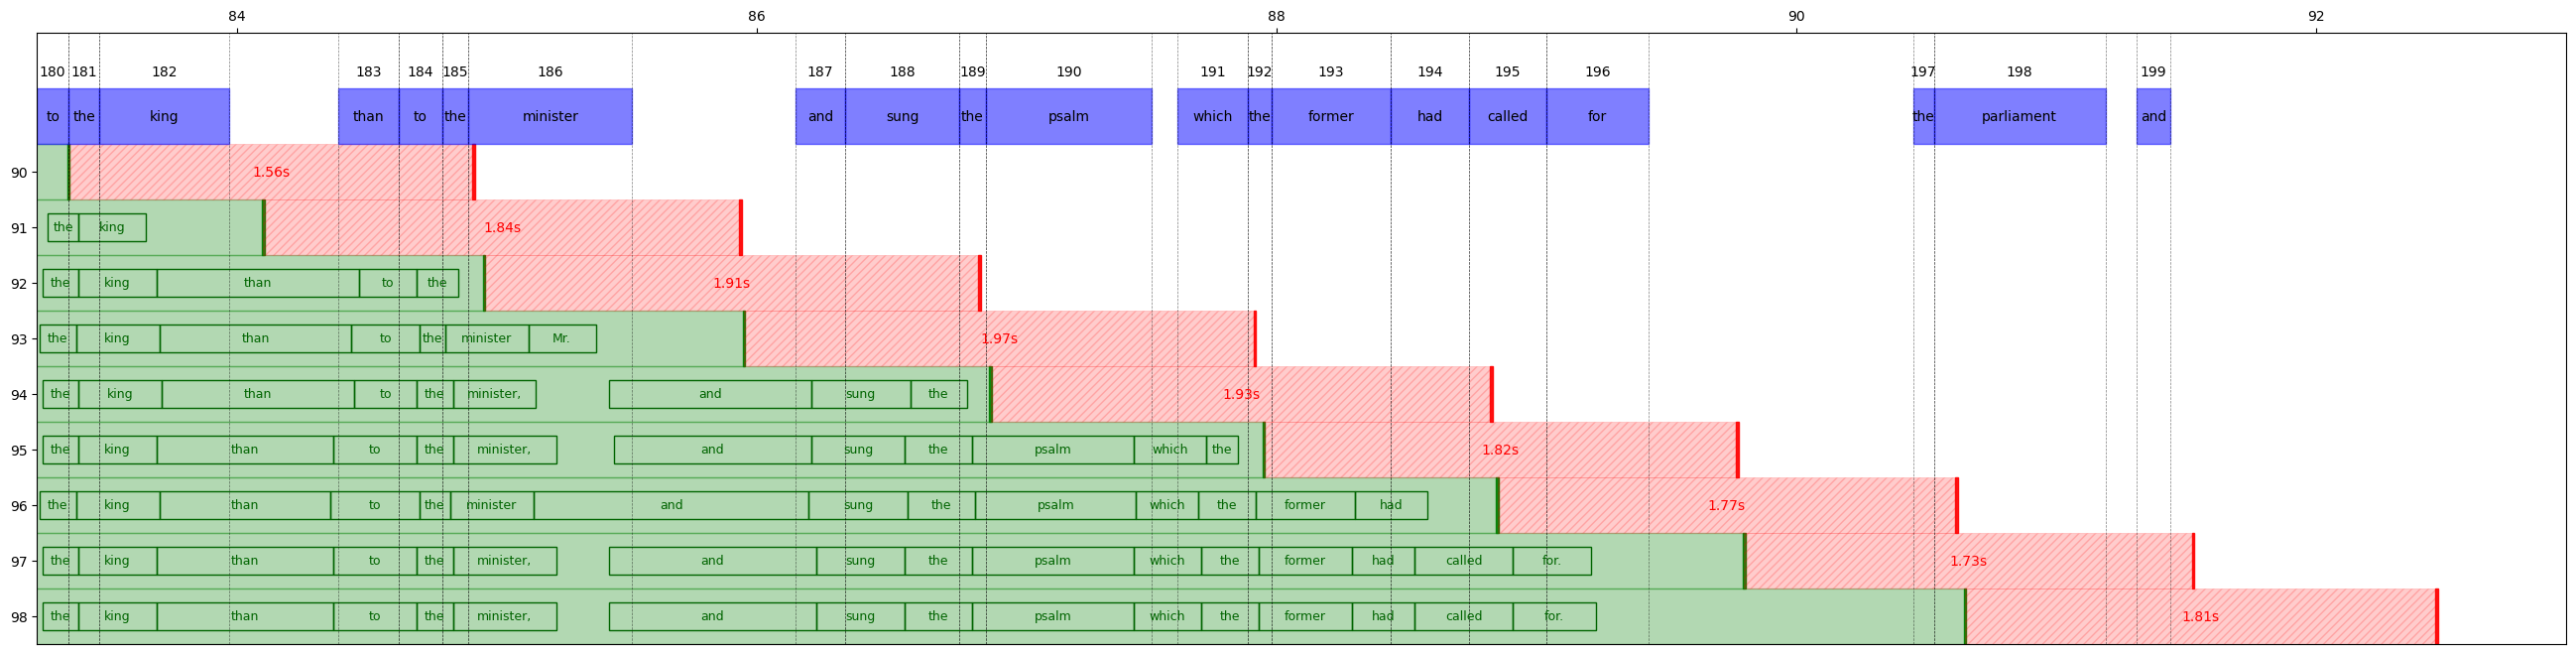

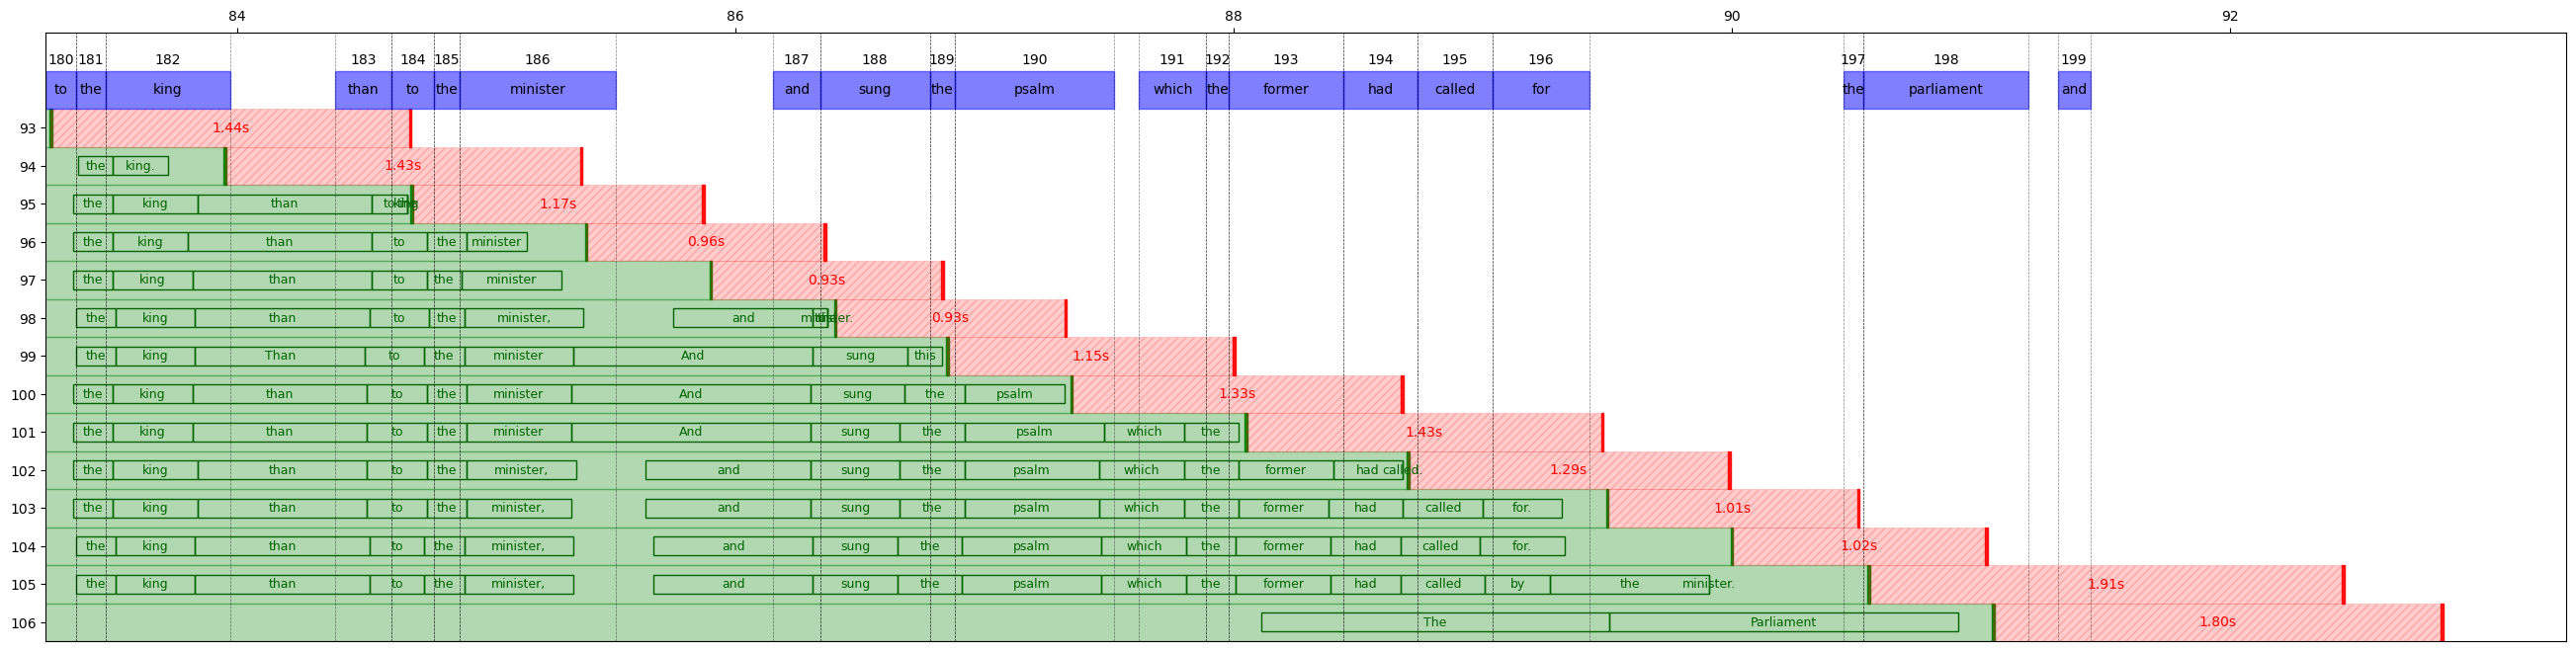

In [63]:
for i in range(len(runs)):
    draw(runs[i].samples[5], 180, 20, alignment=None)

In [64]:
from matplotlib import pyplot as plt

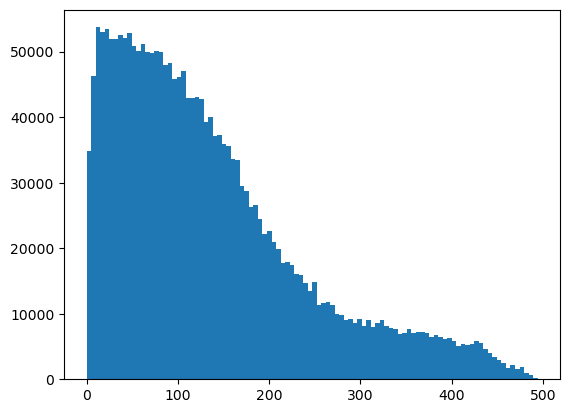

In [65]:
run = runs[0]
word_starts = []
for sample in run.samples:
    for pt in sample.partials:
        for word in pt.result:
            word_starts.append(word.start)

plt.hist(word_starts, bins=100)
plt.show()

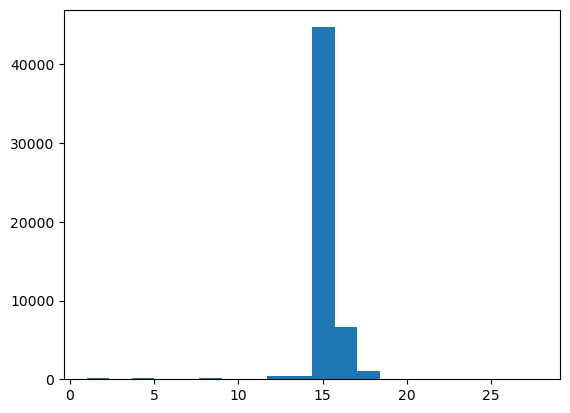

In [66]:
run = runs[0]
window_size = []
for sample in run.samples:
    for pt in sample.partials:
        window_size.append(pt.window[1] - pt.window[0])

plt.hist(window_size, bins=20)
plt.show()

In [68]:
from src.helper.word_sequence import word_sequence_to_string

run = runs[1]
sample = run.samples[0]

y = word_sequence_to_string(sample.baseline)
y_final = word_sequence_to_string(sample.final)

print("Baseline:", y)
print("Final:", y_final)

Baseline: At the conclusion of the banquet, which was served at five o 'clock, the king entered his cabinet, where his tailors were awaiting him for the purpose of trying on the celebrated costume representing spring, which was the result of so much imagination, and had cost so many efforts of thought to the designers and ornament workers of the court. Ah, very well. Let him come in, then, said the king. and as if colbert had been listening at the door for the purpose of keeping himself au courant with the conversation he entered as soon as the king had pronounced his name to the two courtiers gentlemen do your posts whereupon saint haignan and villeroy took their leave certainly sire but i must have money to do that what what do you mean inquired louise he has given them with too much grace not to have others still to give if they are required which is the case at the present moment. It is necessary, therefore, that he should comply. The king frowned. Does your majesty, then, no longe